In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
#Seaborn is a statistical data visualization library based on Matplotlib in Python. It provides a high-level interface for drawing attractive 
#and informative statistical graphics. Seaborn is particularly well-suited for visualizing complex datasets with multiple variables.

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve
import  matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Practical Exam Datasets/Decision Tree & Naive Bayes Classification/NaiveBayes.csv')

In [3]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.tail()

,Age,Salary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum().sum()

0

In [8]:
X = df[['Age','Salary']]
Y = df['Purchased']

In [9]:
model=GaussianNB()

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=10)

In [11]:
model.fit(X_train,Y_train)

GaussianNB()

In [12]:
Y_pred=model.predict(X_test)

In [13]:
accuracy = accuracy_score(Y_test,Y_pred) #Measures the proportion of correctly classified instances out of the total instances.
cm = confusion_matrix(Y_test,Y_pred)
cr = classification_report(Y_test,Y_pred)

In [14]:
print(f"Accuracy : {accuracy}")
print("\nConfusion Matrix :")
print(cm)
print(f"\nClassification Report : {cr}")

Accuracy : 0.91

Confusion Matrix :
[[64  5]
 [ 4 27]]

Classification Report :               precision    recall  f1-score   support

           0       0.94      0.93      0.93        69
           1       0.84      0.87      0.86        31

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



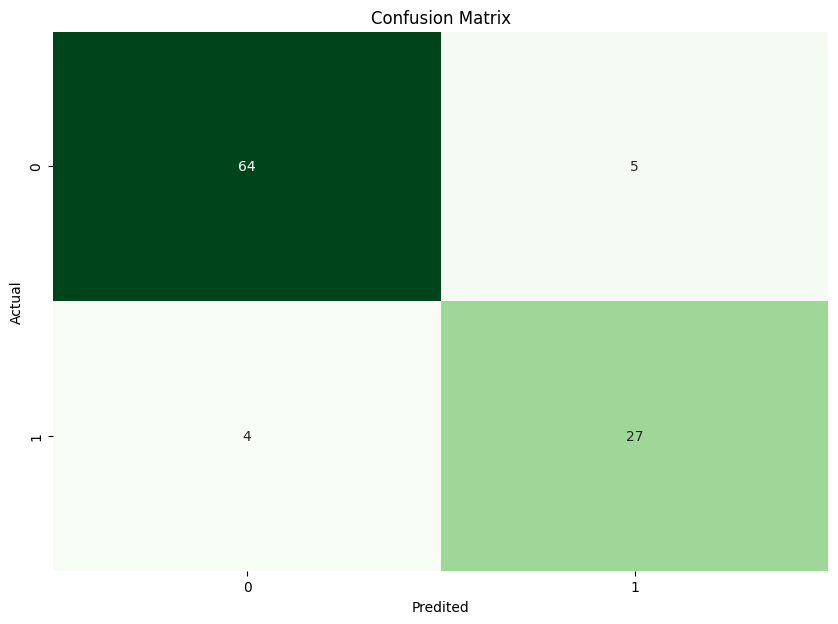

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='Greens',cbar=False)
#annot : It will display the actual values of the confusion matrix in each cell.
#cmap='Blues': This parameter sets the color map for the heatmap. In this case, it uses the 'Blues' color map, 
#cbar=False: This parameter is set to False to disable the colorbar. 
plt.xlabel('Predited')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC)
Y_prob=model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test,Y_prob)#function from scikit-learn calculates the False Positive Rate (FPR), 
#True Positive Rate (TPR), and thresholds at various decision points.

auc_roc=auc(fpr,tpr)#The auc function computes the Area Under the Curve (AUC) for the ROC curve. AUC is a metric that quantifies 
#the overall performance of a binary classification model.

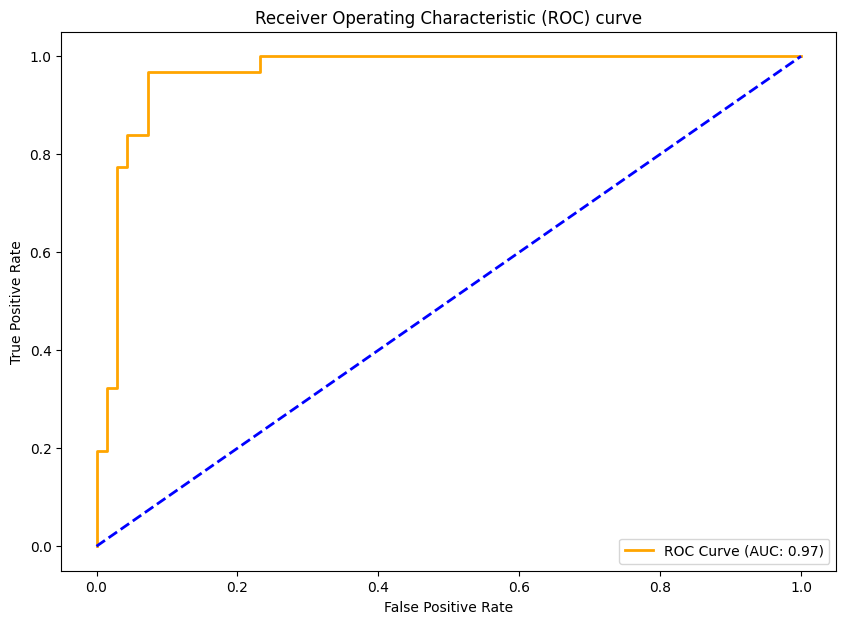

In [17]:
plt.figure(figsize=(10,7))

plt.plot(fpr,tpr,color="Orange",lw=2,label=f'ROC Curve (AUC: {auc_roc:.2f})')#This line plots the ROC curve. 
#The fpr and tpr are the false positive rate and true positive rate obtained from the roc_curve function. 
#The curve is drawn in orange (color="Orange") with a line width of 2 (lw=2). The label includes the AUC value, and it will be displayed in the legend.

plt.plot([0,1],[0,1],color="Blue",lw=2, linestyle="--")#This line plots the diagonal line representing the ROC curve of a random classifier. 
#It is drawn in blue (color="Blue") with a line width of 2 (lw=2). The line is dashed (linestyle="--").

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
#The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model 
#across different decision thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) 
#at various threshold settings. The ROC curve is a valuable tool for evaluating and understanding the trade-offs between sensitivity 
#and specificity in a classification model. 

#The Area Under the Curve (AUC) is a metric used to evaluate the performance of a binary classification model, 
#particularly in the context of a Receiver Operating Characteristic (ROC) curve. AUC quantifies the ability of a model to distinguish 
#between positive and negative instances. 